In [31]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm.notebook import tqdm

In [32]:
# 경로 안에 zip 파일명 리스트 만들기
zip_list = os.listdir('./Data/Training/')
zip_list = zip_list[0:4] # 라벨 파일만 슬라이싱
zip_list

['[라벨]탈모_0.양호.zip', '[라벨]탈모_1.경증.zip', '[라벨]탈모_2.중등도.zip', '[라벨]탈모_3.중증.zip']

In [33]:
data_list = []
where_list = []
for zip_file in tqdm(zip_list):

    # 해당 압축 파일 압축 풀지 않고 읽기
    archive = zipfile.ZipFile(f'./Data/Training/{zip_file}', 'r')

    # 압축 파일 안에 있는 파일명 가져오기
    namelist = archive.namelist()

    # 파일명 하나씩 불러와 파일 읽기
    for name in namelist:
        data = archive.read(name)
        data = data.decode() # 현재 타입 bytes임으로 str로 변환
        data = eval(data) # str 타입 dict로 변환
        data_list.append(data)
        where_list.append(zip_file[:-4])

train_df = pd.DataFrame(data_list)
train_df['where'] = where_list
train_df['image_path'] = './Data/Training/' + train_df['where'] +'/'+ train_df['image_file_name']
train_df['image_path'] = train_df['image_path'].str.replace('라벨', '원천')
train_df = train_df[['image_id', 'image_file_name', 'value_6', 'where', 'image_path']]
train_df.rename(columns={'value_6': '탈모'}, inplace=True)
train_df # 0 : 양호, 1 : 경증, 2: 중등도, 3: 중증

  0%|          | 0/4 [00:00<?, ?it/s]

,image_id,image_file_name,탈모,where,image_path
0,0013_A2LEBJJDE00060O_1606550825417_3,0013_A2LEBJJDE00060O_1606550825417_3_TH.jpg,0,[라벨]탈모_0.양호,./Data/Training/[원천]탈모_0.양호/0013_A2LEBJJDE0006...
1,0177_A2LEBJJDE00152B_1604650530904_6,0177_A2LEBJJDE00152B_1604650530904_6_BH.jpg,0,[라벨]탈모_0.양호,./Data/Training/[원천]탈모_0.양호/0177_A2LEBJJDE0015...
2,0335_A2LEBJJDE00013X_1602916465540_6,0335_A2LEBJJDE00013X_1602916465540_6_BH.jpg,0,[라벨]탈모_0.양호,./Data/Training/[원천]탈모_0.양호/0335_A2LEBJJDE0001...
3,0335_A2LEBJJDE000542_1605676381132_4,0335_A2LEBJJDE000542_1605676381132_4_LH.jpg,0,[라벨]탈모_0.양호,./Data/Training/[원천]탈모_0.양호/0335_A2LEBJJDE0005...
4,0425_A2LEBJJDE00079P_1605793927978_5,0425_A2LEBJJDE00079P_1605793927978_5_RH.jpg,0,[라벨]탈모_0.양호,./Data/Training/[원천]탈모_0.양호/0425_A2LEBJJDE0007...
...,...,...,...,...,...
18508,9887_A2LEBJJDE00066H_1605155133469_6,9887_A2LEBJJDE00066H_1605155133469_6_BH.jpg,3,[라벨]탈모_3.중증,./Data/Training/[원천]탈모_3.중증/9887_A2LEBJJDE0006...
18509,9905_A2LEBJJDE00042M_1602729142776_4,9905_A2LEBJJDE00042M_1602729142776_4_LH.jpg,3,[라벨]탈모_3.중증,./Data/Training/[원천]탈모_3.중증/9905_A2LEBJJDE0004...
18510,9905_A2LEBJJDE00042M_1602729347625_4,9905_A2LEBJJDE00042M_1602729347625_4_LH.jpg,3,[라벨]탈모_3.중증,./Data/Training/[원천]탈모_3.중증/9905_A2LEBJJDE0004...
18511,9905_A2LEBJJDE00042M_1604108127168_4,9905_A2LEBJJDE00042M_1604108127168_4_LH.jpg,3,[라벨]탈모_3.중증,./Data/Training/[원천]탈모_3.중증/9905_A2LEBJJDE0004...


In [34]:
train_df.to_csv('./Data/train_df.csv')

In [35]:
# 경로 안에 zip 파일명 리스트 만들기
zip_list = os.listdir('./Data/Test/')
zip_list = zip_list[0:4] # 라벨 파일만 슬라이싱
zip_list

['[라벨]탈모_0.양호.zip', '[라벨]탈모_1.경증.zip', '[라벨]탈모_2.중등도.zip', '[라벨]탈모_3.중증.zip']

In [36]:
data_list = []
where_list = []
for zip_file in tqdm(zip_list):

    # 해당 압축 파일 압축 풀지 않고 읽기
    archive = zipfile.ZipFile(f'./Data/Test/{zip_file}', 'r')

    # 압축 파일 안에 있는 파일명 가져오기
    namelist = archive.namelist()

    # 파일명 하나씩 불러와 파일 읽기
    for name in namelist:
        data = archive.read(name)
        data = data.decode() # 현재 타입 bytes임으로 str로 변환
        data = eval(data) # str 타입 dict로 변환
        data_list.append(data)
        where_list.append(zip_file[:-4])

test_df = pd.DataFrame(data_list)
test_df['where'] = where_list
test_df['image_path'] = './Data/Test/' + test_df['where'] +'/'+ test_df['image_file_name']
test_df['image_path'] = test_df['image_path'].str.replace('라벨', '원천')
test_df = test_df[['image_id', 'image_file_name', 'value_6', 'where', 'image_path']]
test_df.rename(columns={'value_6': '탈모'}, inplace=True)
test_df # 0 : 양호, 1 : 경증, 2: 중등도, 3: 중증

  0%|          | 0/4 [00:00<?, ?it/s]

,image_id,image_file_name,탈모,where,image_path
0,6995_A2LEBJJDE00104R_1606040549648_5,6995_A2LEBJJDE00104R_1606040549648_5_RH.jpg,0,[라벨]탈모_0.양호,./Data/Test/[원천]탈모_0.양호/6995_A2LEBJJDE00104R_1...
1,7027_A2LEBJJDE001117_1602922543531_2,7027_A2LEBJJDE001117_1602922543531_2_TH.jpg,0,[라벨]탈모_0.양호,./Data/Test/[원천]탈모_0.양호/7027_A2LEBJJDE001117_1...
2,7027_A2LEBJJDE001117_1602988151264_3,7027_A2LEBJJDE001117_1602988151264_3_TH.jpg,0,[라벨]탈모_0.양호,./Data/Test/[원천]탈모_0.양호/7027_A2LEBJJDE001117_1...
3,7027_A2LEBJJDE001117_1603609341639_3,7027_A2LEBJJDE001117_1603609341639_3_TH.jpg,0,[라벨]탈모_0.양호,./Data/Test/[원천]탈모_0.양호/7027_A2LEBJJDE001117_1...
4,7027_A2LEBJJDE001117_1603949553519_3,7027_A2LEBJJDE001117_1603949553519_3_TH.jpg,0,[라벨]탈모_0.양호,./Data/Test/[원천]탈모_0.양호/7027_A2LEBJJDE001117_1...
...,...,...,...,...,...
5283,9244_A2LEBJJDE00154W_1607590387532_5,9244_A2LEBJJDE00154W_1607590387532_5_RH.jpg,3,[라벨]탈모_3.중증,./Data/Test/[원천]탈모_3.중증/9244_A2LEBJJDE00154W_1...
5284,9338_A2LEBJJDE00101D_1606742762533_2,9338_A2LEBJJDE00101D_1606742762533_2_TH.jpg,3,[라벨]탈모_3.중증,./Data/Test/[원천]탈모_3.중증/9338_A2LEBJJDE00101D_1...
5285,9527_A2LEBJJDE00110E_1606732870059_3,9527_A2LEBJJDE00110E_1606732870059_3_TH.jpg,3,[라벨]탈모_3.중증,./Data/Test/[원천]탈모_3.중증/9527_A2LEBJJDE00110E_1...
5286,9527_A2LEBJJDE00110E_1606741400034_3,9527_A2LEBJJDE00110E_1606741400034_3_TH.jpg,3,[라벨]탈모_3.중증,./Data/Test/[원천]탈모_3.중증/9527_A2LEBJJDE00110E_1...


In [37]:
test_df.to_csv('./Data/test_df.csv')

In [43]:
concat_df = pd.concat([train_df, test_df]).reset_index(drop=True)
concat_df.to_csv('./Data/train_test_concat_df.csv')
concat_df

,image_id,image_file_name,탈모,where,image_path
0,0013_A2LEBJJDE00060O_1606550825417_3,0013_A2LEBJJDE00060O_1606550825417_3_TH.jpg,0,[라벨]탈모_0.양호,./Data/Training/[원천]탈모_0.양호/0013_A2LEBJJDE0006...
1,0177_A2LEBJJDE00152B_1604650530904_6,0177_A2LEBJJDE00152B_1604650530904_6_BH.jpg,0,[라벨]탈모_0.양호,./Data/Training/[원천]탈모_0.양호/0177_A2LEBJJDE0015...
2,0335_A2LEBJJDE00013X_1602916465540_6,0335_A2LEBJJDE00013X_1602916465540_6_BH.jpg,0,[라벨]탈모_0.양호,./Data/Training/[원천]탈모_0.양호/0335_A2LEBJJDE0001...
3,0335_A2LEBJJDE000542_1605676381132_4,0335_A2LEBJJDE000542_1605676381132_4_LH.jpg,0,[라벨]탈모_0.양호,./Data/Training/[원천]탈모_0.양호/0335_A2LEBJJDE0005...
4,0425_A2LEBJJDE00079P_1605793927978_5,0425_A2LEBJJDE00079P_1605793927978_5_RH.jpg,0,[라벨]탈모_0.양호,./Data/Training/[원천]탈모_0.양호/0425_A2LEBJJDE0007...
...,...,...,...,...,...
23796,9244_A2LEBJJDE00154W_1607590387532_5,9244_A2LEBJJDE00154W_1607590387532_5_RH.jpg,3,[라벨]탈모_3.중증,./Data/Test/[원천]탈모_3.중증/9244_A2LEBJJDE00154W_1...
23797,9338_A2LEBJJDE00101D_1606742762533_2,9338_A2LEBJJDE00101D_1606742762533_2_TH.jpg,3,[라벨]탈모_3.중증,./Data/Test/[원천]탈모_3.중증/9338_A2LEBJJDE00101D_1...
23798,9527_A2LEBJJDE00110E_1606732870059_3,9527_A2LEBJJDE00110E_1606732870059_3_TH.jpg,3,[라벨]탈모_3.중증,./Data/Test/[원천]탈모_3.중증/9527_A2LEBJJDE00110E_1...
23799,9527_A2LEBJJDE00110E_1606741400034_3,9527_A2LEBJJDE00110E_1606741400034_3_TH.jpg,3,[라벨]탈모_3.중증,./Data/Test/[원천]탈모_3.중증/9527_A2LEBJJDE00110E_1...


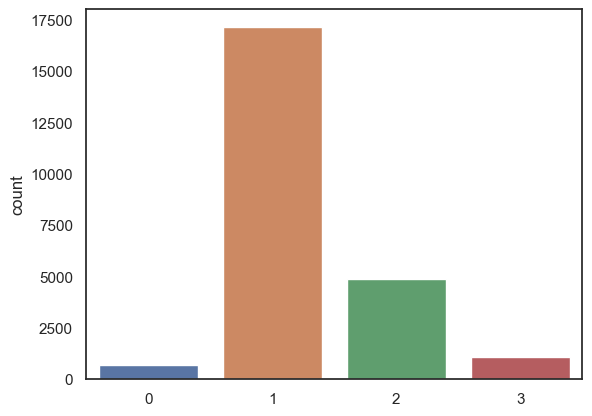

In [44]:
plt.rc('font', family='NanumGothic')
%matplotlib inline
sns.set(style="white")

sns.countplot(x='탈모', data = concat_df)
plt.xlabel('')
plt.show()

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
%matplotlib inline

def show_img():
    plt.figure(figsize=(15, 10))
    df = pd.read_csv('./Data/train_test_concat_df.csv', index_col=0)
    for i in range(4):
        if i == 0:
            dataset = df[df['탈모'] == 0].reset_index(drop=True)
        elif i == 1 :
            dataset = df[df['탈모'] == 1].reset_index(drop=True)
        elif i == 2 :
            dataset = df[df['탈모'] == 2].reset_index(drop=True)
        else:
            dataset = df[df['탈모'] == 3].reset_index(drop=True)
        random = np.random.randint(1, len(dataset))
        plt.subplot(1, 4, i + 1)
        img = cv2.imread(dataset["image_path"][random], cv2.IMREAD_COLOR)

        b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
        img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
        plt.imshow(img2)
        plt.title('탈모 ' + str(dataset.loc[random, '탈모']), size=15)
        plt.xticks([])
        plt.yticks([])
    plt.show()

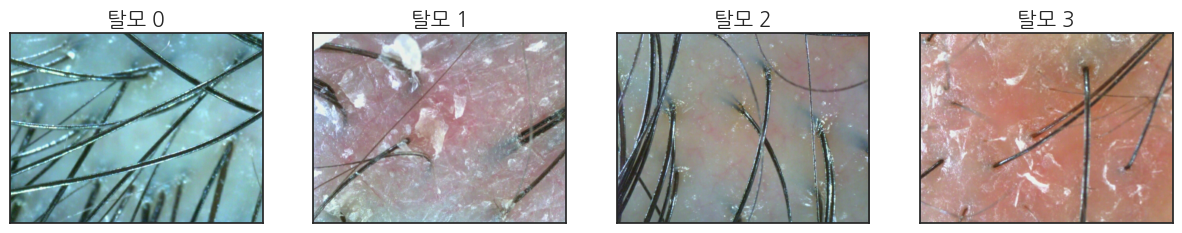

In [50]:
show_img()